<a href="https://colab.research.google.com/github/jessicahazel/Minor_Project/blob/main/Team_8_Minor_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
from IPython.display import Image, HTML
import re
from IPython.core.display import display, HTML, Javascript
from string import Template
import pandas as pd
import numpy as np
import json
import IPython.display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import seaborn as sns
sns.set_style("darkgrid")
# from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
 
%matplotlib inline
py.init_notebook_mode(connected=True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##pre processing

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/CompleteDataset.csv', encoding='utf-8')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning:

Columns (23,35) have mixed types.Specify dtype option on import or set low_memory=False.



In [ ]:
data = data.drop(data.columns[0], axis = 1)
def in_preferred_position(list_pos, pos):
    if pos in list_pos:
        return True
    return False

data['Preferred Positions'] = list(map(lambda x: x.split(), data['Preferred Positions']))

def str2number(amount):
    if amount[-1] == 'M':
        return float(amount[1:-1])*1000000
    elif amount[-1] == 'K':
        return float(amount[1:-1])*1000
    else:
        return float(amount[1:])

data['Value'] = data['Value'].apply(lambda x: str2number(x))
data['Wage'] = data['Wage'].apply(lambda x: str2number(x)) 


In [ ]:
data = data[data['Value'].notnull()]

In [ ]:
data.apply(pd.to_numeric, errors='coerce')
def convert_to_float(x):
    if len(str(x).split('+')) > 1:
        return float(str(x).split('+')[0])
    if len(str(x).split('-')) > 1:
        return float(str(x).split('-')[0])
    else:
        return float(x)

a = [ 'Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking',
       'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions',
       'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties',
       'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys']

for p in a:
    data[p] = list(map(convert_to_float, data[p])) 

In [ ]:
mapping = {'ST': 'Attack', 'RW': 'Attack', 'LW': 'Attack', 'RM': 'Midfield', 'CM': 'Midfield', 'LM': 'Midfield', 'CAM': 'Midfield', 'CF': 'Midfield', 'CDM': 'Midfield', 'CB': 'Defence', 'LB': 'Defence', 'RB': 'Defence', 'RWB': 'Defence', 'LWB': 'Defence', 'GK': 'Goalkeeper'}

# for position in mapping.keys(): 
#     data[[in_preferred_position(x, position) for x in data['Preferred Positions']]]
    
for index, row in data.iterrows():
    data.loc[index, 'FieldPosition'] = mapping[row['Preferred Positions'][0]]

In [ ]:
continents = {
    'Africa' : ['Algeria','Angola','Benin','Botswana','Burkina','Burundi','Cameroon','Cape Verde','Central African Republic','Chad','Comoros','Congo','DR Congo','Djibouti','Egypt','Equatorial Guinea','Eritrea','Ethiopia','Gabon','Gambia','Ghana','Guinea','Guinea Bissau','Ivory Coast','Kenya','Lesotho','Liberia','Libya','Madagascar','Malawi','Mali','Mauritania','Mauritius','Morocco','Mozambique','Namibia','Niger','Nigeria','Rwanda','Sao Tome and Principe','Senegal','Seychelles','Sierra Leone','Somalia','South Africa','South Sudan','Sudan','Swaziland','Tanzania','Togo','Tunisia','Uganda','Zambia','Zimbabwe','Burkina Faso'],
    'Antarctica' : ['Fiji','Kiribati','Marshall Islands','Micronesia','Nauru','Palau','Papua New Guinea','Samoa','Solomon Islands','Tonga','Tuvalu','Vanuatu'],
    'Asia' : ['Afghanistan','Bahrain','Bangladesh','Bhutan','Brunei','Burma (Myanmar)','Cambodia','China','China PR','East Timor','India','Indonesia','Iran','Iraq','Israel','Japan','Jordan','Kazakhstan','North Korea','South Korea','Korea Republic','Korea DPR','Kuwait','Kyrgyzstan','Laos','Lebanon','Malaysia','Maldives','Mongolia','Nepal','Oman','Pakistan','Palestine','Philippines','Qatar','Russian Federation','Saudi Arabia','Singapore','Sri Lanka','Syria','Tajikistan','Thailand','Turkey','Turkmenistan','United Arab Emirates','Uzbekistan','Vietnam','Yemen','Russia'],
    'Australia Oceania' : ['Australia','New Caledonia', 'New Zealand'],
    'Europe' : ['Albania','Andorra','Armenia','Austria','Azerbaijan','Belarus','Belgium','Bosnia Herzegovina','Bulgaria','Croatia','Cyprus','Czech Republic','Denmark','Estonia','Finland','France','FYR Macedonia','Georgia','Germany','Greece','Hungary','Iceland','Ireland','Italy','Kosovo','Latvia','Liechtenstein','Lithuania','Luxembourg','Macedonia','Malta','Moldova','Monaco','Montenegro','Netherlands','Northern Ireland','Norway','Poland','Portugal','Romania','San Marino','Scotland','Serbia','Slovakia','Slovenia','Spain','Sweden','Switzerland','Ukraine','England','Vatican City','Republic of Ireland','Wales'],
    'North America' : ['Antigua and Barbuda','Bahamas','Barbados','Belize','Canada','Costa Rica','Cuba','Dominica','Dominican Republic','El Salvador','Grenada','Guatemala','Haiti','Honduras','Jamaica','Mexico','Nicaragua','Panama','Saint Kitts and Nevis','Saint Lucia','Saint Vincent and the Grenadines','Trinidad and Tobago','United States'],
    'South America' : ['Argentina','Bolivia','Brazil','Chile','Colombia','Curacao','Ecuador','Guyana','Paraguay','Peru','Suriname','Trinidad & Tobago','Uruguay','Venezuela']
}

In [ ]:
def find_continent(x, continents_list):
    # Iteration over 
    for key in continents_list:
        if x in continents_list[key]:
            return key
    return np.NaN

data['Continent'] = data['Nationality'].apply(lambda x: find_continent(x, continents))

In [ ]:
data.drop(['Photo'], axis = 1,inplace=True)

In [ ]:
data.head()

,Name,Age,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,...,RCM,RDM,RF,RM,RS,RW,RWB,ST,FieldPosition,Continent
0,Cristiano Ronaldo,32,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,95500000.0,565000.0,...,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0,Attack,Europe
1,L. Messi,30,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,105000000.0,565000.0,...,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0,Attack,South America
2,Neymar,25,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,123000000.0,280000.0,...,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0,Attack,South America
3,L. Suárez,30,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,97000000.0,510000.0,...,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0,Attack,South America
4,M. Neuer,31,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,61000000.0,230000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Goalkeeper,Europe


In [ ]:
top_1000 = data.sort_values("Overall", ascending=False).reset_index().head(2000)[["Name", "Nationality", "Continent", "Overall", "Club"]]

In [ ]:
data_f = {}
data_f["name"] = "DISTRIBUTION OF TOP 1000 PLAYERS ACCORDING TO NATIONALITY"
data_f["children"] = []

# Split dataset into Continents:
for continent in top_1000['Continent'].unique():
    
    continent_set = top_1000[top_1000["Continent"]==continent]
    continent_dict = {}
    continent_dict["name"] = continent
    continent_dict["children"] = []
    
    for country in continent_set['Nationality'].unique():
        
        countries_set = continent_set[continent_set['Nationality']==country][['Name', 'Overall']]
        
        country_dict = {}
        country_dict["name"] = country
        country_dict["children"] = []
        
        for player in countries_set.values:
            
            player_dict = {}
            player_dict['name'] = player[0]
            player_dict['size'] = player[1]/20
            country_dict["children"].append(player_dict)
            
        continent_dict['children'].append(country_dict)
        
    data_f["children"].append(continent_dict)

##EDA

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")

# Load the example mpg dataset
mpg = data

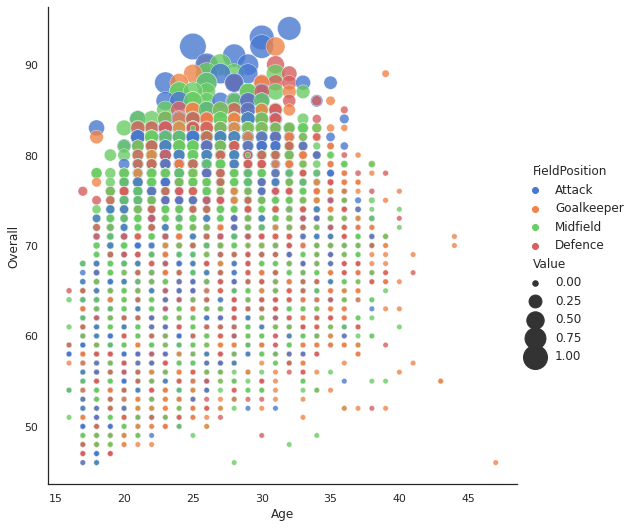

In [ ]:
p = sns.relplot(x="Age", y="Overall", hue="FieldPosition", size="Value",sizes=(30, 700), alpha=0.8, palette="muted",height=7.5, data=mpg)

In [ ]:
def overallbox():
    df = data.copy()
    sns.set(style="ticks", palette="pastel")
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)


    top10 = list(df['Nationality'].value_counts().head(10).index)
    d = df.query('Nationality in @top10')
    box_overall = sns.boxplot(data = d, y = 'Overall', x = 'Nationality')
    sns.despine(offset=10, trim=True)

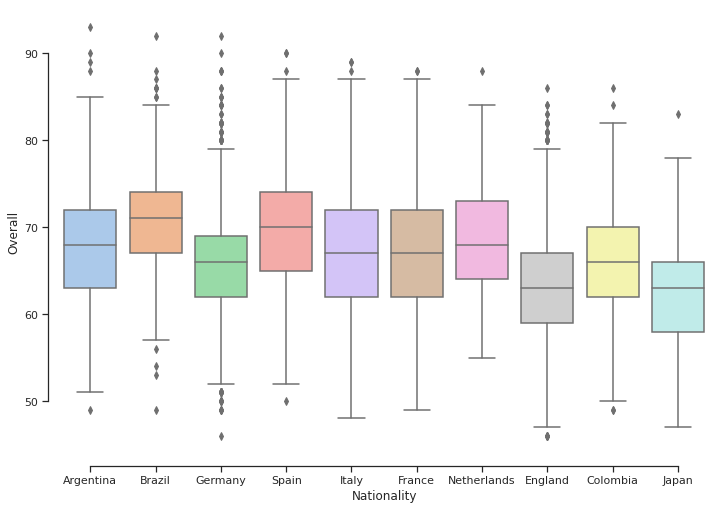

In [ ]:
overallbox()

In [ ]:
def potential_box():
    df = data.copy()
    sns.set(style="ticks", palette="pastel")
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)

    top10 = list(df['Nationality'].value_counts().head(10).index)
    d = df.query('Nationality in @top10')
    box_potential = sns.boxplot(data=d, y = 'Potential', x = 'Nationality')
    sns.despine(offset=10, trim=True)

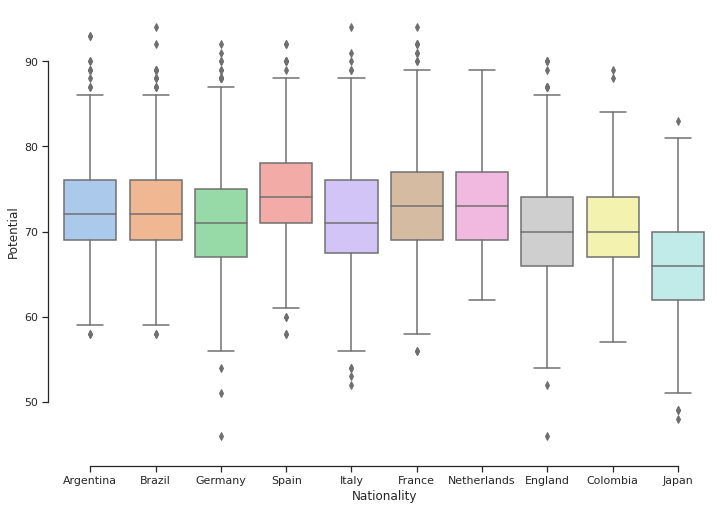

In [ ]:
potential_box()

In [ ]:
df_top10clubs = data[["Name", "Overall", "Club"]]
topclubs = df_top10clubs.groupby("Club", as_index= False).median().sort_values("Overall", ascending = False).head(10)
topclubs = list(topclubs["Club"])

In [ ]:
df_top10clubs.groupby("Club", as_index= False).median().sort_values("Overall", ascending = False).head(10)

,Club,Overall
466,Real Madrid CF,83.0
330,Juventus,82.5
222,FC Bayern Munich,82.5
219,FC Barcelona,82.0
432,Paris Saint-Germain,81.0
51,Arsenal,80.0
377,Manchester United,80.0
67,Atlético Madrid,79.5
397,Napoli,79.0
529,Sevilla FC,79.0


In [ ]:
def club_overall():
    clubs = topclubs
    c = data.query('Club in @clubs')

    sns.set(style="ticks", palette="pastel")
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)

    box_wage = sns.boxplot(data = c, y = 'Overall', x = 'Club')
    sns.despine(offset=10, trim=True)
    a = plt.setp(ax.get_xticklabels(), rotation=45)

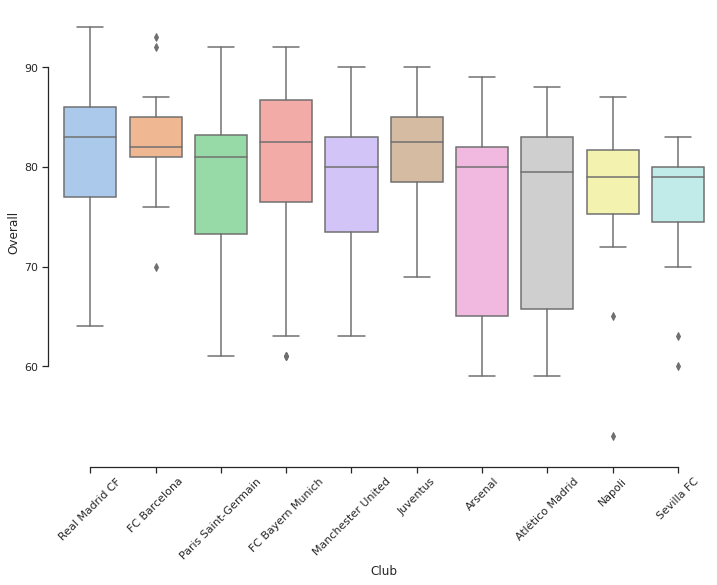

In [ ]:
club_overall()

In [ ]:
df_top10clubs = data[["Name", "Overall", "Club"]]
topclubs = df_top10clubs.groupby("Club", as_index= False).median().sort_values("Overall", ascending = False).head(10)
topclubs = list(topclubs["Club"])
def club_potential():
    clubs = topclubs
    c = data.query('Club in @clubs')

    sns.set(style="ticks", palette="pastel")
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)

    box_wage = sns.catplot( y = 'Potential', x = 'Club',data = c)
    sns.despine(offset=10, trim=True)
    a = plt.setp(ax.get_xticklabels(), rotation=45)


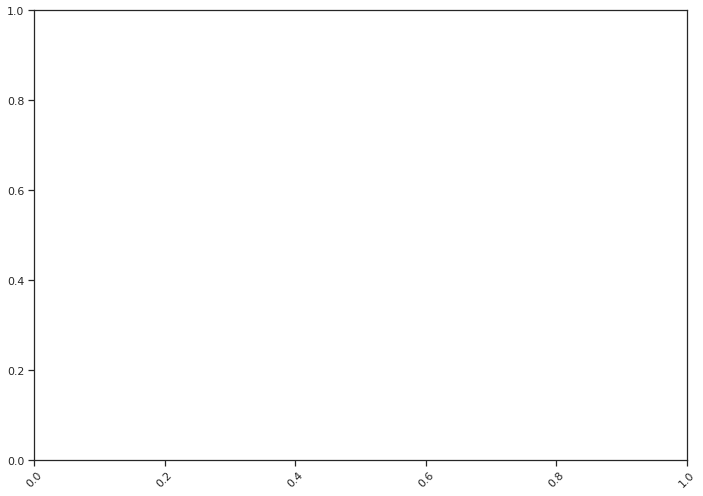

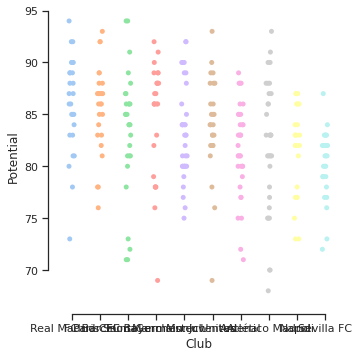

In [ ]:
club_potential()

In [ ]:
def clubwage():
    clubs = topclubs
    c = data.query('Club in @clubs')

    sns.set(style="ticks", palette="pastel")
    a4_dims = (12, 10)
    fig, ax = plt.subplots(figsize=a4_dims)

    box_wage = sns.boxplot(data = c, y = 'Wage', x = 'Club')
    sns.despine(offset=10, trim=True)
    a = plt.setp(ax.get_xticklabels(), rotation=45)

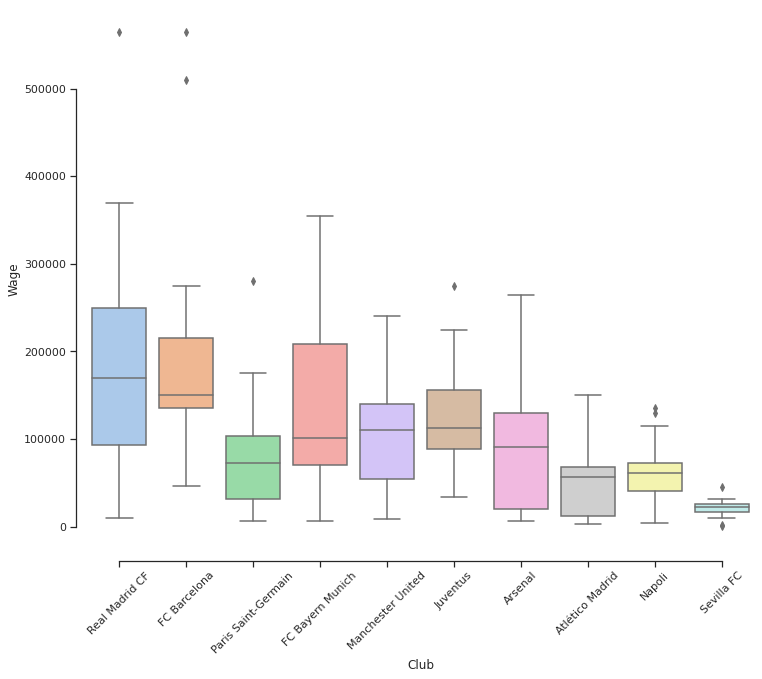

In [ ]:
clubwage()

In [ ]:
def overall_potential():
    df = data.copy()
    overall = pd.DataFrame(df.groupby(["Age"])['Overall'].mean())
    potential = pd.DataFrame(df.groupby(["Age"])['Potential'].mean())
    merged = pd.merge(overall, potential, on='Age', how='inner')
    merged['Age']= merged.index
    fig, ax = plt.subplots(figsize=(11, 8))
    merged.reset_index(drop = True, inplace = True)
    p = plt.plot('Age', 'Overall', data=merged, marker='.', color='skyblue', linewidth=1, label ="Overall" )
    p = plt.plot('Age', 'Potential', data=merged, marker='.', color='green', linewidth=1, label = "Potential")
    p = plt.legend()

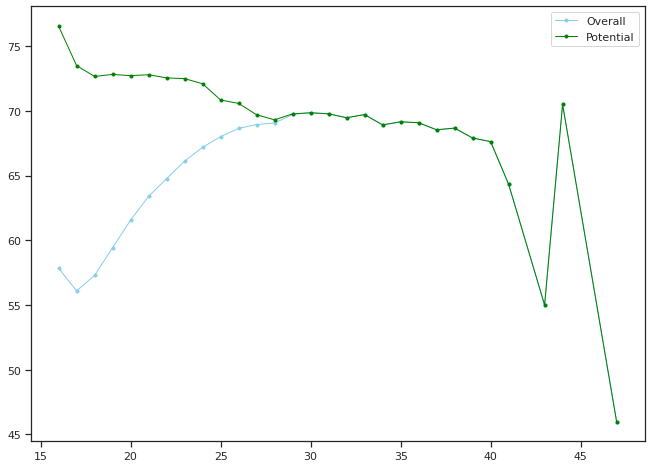

In [ ]:
overall_potential()

In [ ]:
#Selects list of non-goal keeper attribute ratings and creates a correlation matrix(as a heatmap) with respect to Overall Rating
def correlation():
    L = [11]+list(range(13,25))+list(range(30,48))
    df = data.iloc[ :, L]
    fig, ax = plt.subplots()
    fig.set_size_inches(13,11)
    ax = sns.heatmap(df.corr(),cmap = "Blues").set_title('Correlation matrix')

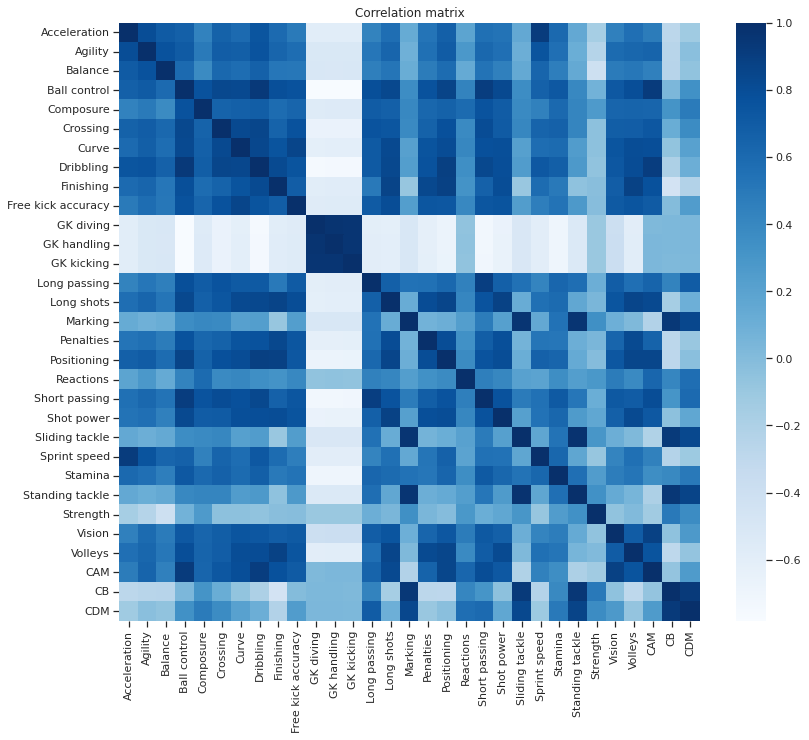

In [ ]:
correlation()

In [ ]:
df = data.copy()
df_overall = df.corr()
df_overall[df_overall['Overall']>=0.5]

,Age,Overall,Potential,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
Overall,0.459765,1.000000,0.683474,0.626001,0.593789,0.604092,0.204208,0.398523,0.265458,0.096650,...,0.561887,0.448856,0.764609,0.607727,0.636278,0.656745,0.664822,0.610198,0.629401,0.664822
Potential,-0.218264,0.683474,1.000000,0.588074,0.519062,0.399511,0.244777,0.188953,0.233688,0.133937,...,0.330672,0.219380,0.508133,0.345344,0.458830,0.474998,0.447747,0.448580,0.383213,0.447747
Value,0.079309,0.626001,0.588074,1.000000,0.850510,0.376629,0.176705,0.187013,0.201782,0.105964,...,0.285914,0.189990,0.487380,0.310861,0.450063,0.453571,0.456517,0.432871,0.338847,0.456517
Wage,0.150006,0.593789,0.519062,0.850510,1.000000,0.367419,0.146776,0.206926,0.174240,0.085943,...,0.299300,0.220554,0.457183,0.321822,0.408102,0.412422,0.421092,0.390940,0.343395,0.421092
Special,0.238667,0.604092,0.399511,0.376629,0.367419,1.000000,0.649445,0.667080,0.690667,0.578269,...,0.623048,0.401629,0.943764,0.650723,0.822487,0.872130,0.793552,0.825615,0.735167,0.793552
Composure,0.322318,0.629755,0.402119,0.402123,0.391802,0.803480,0.437962,0.582043,0.494172,0.374127,...,0.416531,0.312258,0.713268,0.487595,0.615240,0.615881,0.629247,0.583742,0.490408,0.629247
Reactions,0.460826,0.840578,0.520029,0.531255,0.502202,0.587610,0.191965,0.395601,0.278791,0.138629,...,0.524636,0.410237,0.732892,0.570878,0.613173,0.622916,0.629620,0.581809,0.591106,0.629620
CAM,0.245855,0.650313,0.470421,0.454702,0.412427,0.854197,0.482323,0.058404,0.644696,0.453448,...,0.204500,-0.070694,0.903315,0.257182,0.986346,0.983408,0.927452,0.983941,0.368896,0.927452
CDM,0.383450,0.607727,0.345344,0.310861,0.321822,0.650723,-0.125382,0.711143,-0.026538,-0.053700,...,0.968022,0.929486,0.631197,1.000000,0.165728,0.292332,0.129067,0.175801,0.955188,0.129067
CF,0.235596,0.636278,0.458830,0.450063,0.408102,0.822487,0.506615,0.025880,0.630668,0.428978,...,0.123218,-0.141250,0.846493,0.165728,1.000000,0.970136,0.967872,0.986833,0.286582,0.967872


In [ ]:
df_overall[(df_overall['Overall'] >= 0.4) & (df_overall['Overall'] < 0.5)]

,Age,Overall,Potential,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
Age,1.000000,0.459765,-0.218264,0.079309,0.150006,0.238667,-0.152360,0.264230,-0.018748,-0.087471,...,0.321227,0.337481,0.365783,0.383450,0.235596,0.232945,0.287541,0.206051,0.337143,0.287541
Ball control,0.083289,0.452109,0.361380,0.309587,0.294039,0.906099,0.670556,0.539641,0.701015,0.596927,...,0.278594,0.037192,0.873643,0.336033,0.902495,0.911065,0.846925,0.899655,0.425526,0.846925
Curve,0.145262,0.413085,0.284305,0.286347,0.268419,0.846584,0.600083,0.392908,0.674919,0.578689,...,0.176601,-0.063921,0.724697,0.207348,0.783036,0.793301,0.729344,0.795932,0.315823,0.729344
Long passing,0.185017,0.475162,0.329959,0.299363,0.290247,0.844672,0.433993,0.579853,0.515275,0.457718,...,0.593834,0.429906,0.848347,0.694205,0.544039,0.641048,0.460245,0.555866,0.676560,0.460245
Long shots,0.151130,0.412818,0.273407,0.280453,0.264717,0.832758,0.571380,0.389374,0.637671,0.522427,...,0.031134,-0.157930,0.709531,0.099278,0.852065,0.778209,0.860504,0.817082,0.166831,0.860504
Short passing,0.130914,0.488375,0.371326,0.323913,0.308240,0.903003,0.561425,0.596585,0.610704,0.535376,...,0.505533,0.309181,0.916952,0.600788,0.726223,0.786031,0.654957,0.725103,0.619095,0.654957
Shot power,0.149648,0.427811,0.291052,0.280434,0.272138,0.829589,0.536658,0.494836,0.565988,0.452206,...,0.089727,-0.039964,0.647020,0.165033,0.762366,0.678388,0.822876,0.700408,0.196946,0.822876
Vision,0.189895,0.481185,0.341213,0.345148,0.317941,0.754142,0.456469,0.296788,0.591396,0.487387,...,0.183308,-0.044073,0.841507,0.269515,0.840995,0.841716,0.755299,0.830745,0.325337,0.755299
CB,0.337481,0.448856,0.219380,0.189990,0.220554,0.401629,-0.278589,0.748357,-0.258303,-0.251397,...,0.926170,1.000000,0.328064,0.929486,-0.141250,-0.029624,-0.129200,-0.139745,0.849959,-0.129200
LCB,0.337481,0.448856,0.219380,0.189990,0.220554,0.401629,-0.278589,0.748357,-0.258303,-0.251397,...,0.926170,1.000000,0.328064,0.929486,-0.141250,-0.029624,-0.129200,-0.139745,0.849959,-0.129200


In [ ]:
data_top1000 = data
# Grouping the data by Age as index and displaying Value and Wage as per age groups  
age_wagevalue = data_top1000[data_top1000.Age<=38].groupby(['Age']).agg({'Wage': 'mean', 'Value': 'mean'})      

# Plotting Value over Age with Line and Bar
                                   
data_plot1 = [
    go.Scatter(
        x=age_wagevalue.index, 
        y=age_wagevalue['Value'],
        marker = dict(
          color = 'rgb(0,0,153)'
        ),
                name = "Average Player Value as Line"
            ),
    go.Bar(
        x = age_wagevalue.index,
        y=age_wagevalue['Value'],
        base = 0,
        marker = dict(
          color = 'rgb(51,153,255)'
        ),
                name = "Average Player Value as Bars"
    )
]

layout_plot1 = go.Layout(
    title='Value of players over Age',
    yaxis=dict(title='Average Player Value in Euros(Millions)'),
    xaxis=dict(title='Player Age')
)

fig1 = go.Figure(data=data_plot1, layout=layout_plot1)

In [ ]:
py.iplot(fig1)

In [ ]:
def get_best_squad(formation, data, club='', country=''):
    df = data.copy()
    squad = []
    if country:
        df = df[df['Nationality'] == country.title()]
    if club:
        df = df[df['Club'] == club.title()]
    for position in formation:
        if (position == 'GK'):
            g = df[[in_preferred_position(x, position) for x in df['Preferred Positions']]]
            g = g.sort_values('Overall', ascending=False)
            player = g.iloc[0][['ID', 'Name', 'Nationality', 'Overall', 'Preferred Positions']]
            position_rating = player['Overall']
        else:
            ng = df[[in_preferred_position(x, position) for x in df['Preferred Positions']]]
            if ng.empty:
                ng = df
            ng = ng.sort_values(str(position), ascending=False)
            player = ng.iloc[0]
            position_rating = player[position]
            player = player[['ID', 'Name', 'Nationality', 'Overall', 'Preferred Positions']]   
        player['Position'] = str(position)
        player['Position Rating'] = position_rating
        squad.append(player)
        df = df[df['ID'] != player['ID']]
    squad = pd.DataFrame(np.array(squad).reshape(11,7), columns = ['ID','Name', 'Nationality', 'OVR', 'Preferred Positions', 'Position', 'Rating'])
    return squad

In [ ]:
squad_433 = ['GK', 'LWB', 'LCB', 'CB', 'RB', 'LM', 'CDM', 'RM', 'LW', 'ST', 'RW']
s = get_best_squad(squad_433, data, country='', club='')
s[['Name', 'Rating', 'Position', 'Nationality']]

,Name,Rating,Position,Nationality
0,M. Neuer,92,GK,Germany
1,D. Rose,81.0,LWB,England
2,Sergio Ramos,87.0,LCB,Spain
3,G. Chiellini,86.0,CB,Italy
4,Azpilicueta,84.0,RB,Spain
5,A. Sánchez,85.0,LM,Chile
6,A. Vidal,85.0,CDM,Chile
7,K. De Bruyne,85.0,RM,Belgium
8,Cristiano Ronaldo,91.0,LW,Portugal
9,L. Suárez,88.0,ST,Uruguay


In [ ]:
train_columns = ['Special', 'Acceleration', 'Aggression', 'Agility', 'Balance',
       'Ball control', 'Composure', 'Crossing', 'Curve', 'Dribbling',
       'Finishing', 'Free kick accuracy', 'GK diving', 'GK handling',
       'GK kicking', 'GK positioning', 'GK reflexes', 'Heading accuracy',
       'Interceptions', 'Jumping', 'Long passing', 'Long shots', 'Marking',
       'Penalties', 'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys', 'Age', 'FieldPosition']

model_data = data.copy()
model_data = model_data[model_data['FieldPosition'] != 'Goalkeeper']
mapping = {'Attack' : 0, 'Midfield': 1, 'Defence': 2}
model_data = model_data.replace({'FieldPosition': mapping})

X = model_data[['Special', 'Acceleration', 'Aggression', 'Agility', 'Balance',
       'Ball control', 'Composure', 'Crossing', 'Curve', 'Dribbling',
       'Finishing', 'Free kick accuracy', 'GK diving', 'GK handling',
       'GK kicking', 'GK positioning', 'GK reflexes', 'Heading accuracy',
       'Interceptions', 'Jumping', 'Long passing', 'Long shots', 'Marking',
       'Penalties', 'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys', 'Age']]
Y = model_data['FieldPosition']

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)
lr = LogisticRegression()
lr.fit(X_train, y_train)
preds = lr.predict(X_test)



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
     
def plot_confusion_matrix(cm, classes,      
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    cnf_matrix = confusion_matrix(y_test, preds)
np.set_printoptions(precision=2)

In [ ]:

def logistic_reg():

    # import seaborn as sns
    cnf_matrix = confusion_matrix(y_test, preds)
    np.set_printoptions(precision=2)

    # cm = confusion_matrix(y_test, preds)
    # f = sns.heatmap(cm, annot=True)                     
    # def randomforrest():
    plt.figure()

    # # Plot normalized confusion matrix
    # plt.figure()
    plot_confusion_matrix(cnf_matrix, normalize=True,  classes=[0,1,2],
                         title='Normalized confusion matrix')

Normalized confusion matrix
[[6.94e-01 2.96e-01 9.96e-03]
 [7.33e-02 8.14e-01 1.13e-01]
 [7.23e-04 1.37e-01 8.62e-01]]


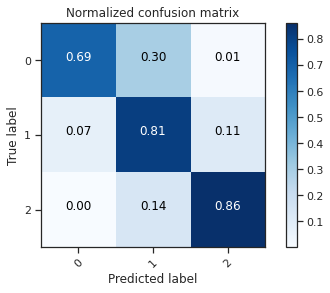

In [ ]:
logistic_reg()

In [ ]:
from sklearn import metrics  
print()

print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test,preds)*100)


ACCURACY OF THE MODEL:  80.64192577733199


In [ ]:
new_input = X_test.values[1]

In [ ]:
new_input1 = [new_input]
new_input1

[array([1803.,   72.,   79.,   59.,   53.,   78.,   75.,   61.,   40.,
          72.,   80.,   38.,    7.,    8.,   15.,   10.,    6.,   78.,
          28.,   75.,   46.,   73.,   24.,   73.,   81.,   74.,   63.,
          85.,   32.,   77.,   66.,   24.,   87.,   65.,   74.,   28.])]

In [ ]:
new_output = lr.predict(new_input1)
new_output

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



array([0])

In [ ]:
new_output
if new_output==[0]:
    print('Position is "attack"')
elif new_output == [1]:
    print('Position is "midfield"')
else:
    print('position is "Defence"')

Position is "attack"


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

clf = RandomForestClassifier(max_depth=200, random_state=0)
clf.fit(X_train, y_train)

preds = clf.predict(X_test)

clf_matrix = confusion_matrix(y_test, preds)
np.set_printoptions(precision=2)

In [ ]:
def randomforrest():


    # Plot normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(clf_matrix, normalize=True,  classes=[0,1,2],
                          title='Normalized confusion matrix')

Normalized confusion matrix
[[6.89e-01 3.03e-01 8.72e-03]
 [6.50e-02 8.30e-01 1.05e-01]
 [7.23e-04 1.24e-01 8.76e-01]]


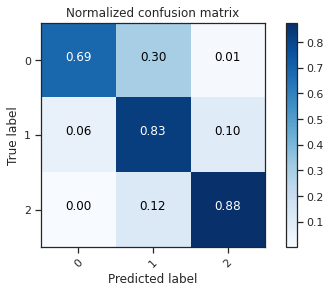

In [ ]:
randomforrest()

In [ ]:
from sklearn import metrics  
print()

print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test,preds)*100)


ACCURACY OF THE MODEL:  81.74523570712137


In [ ]:
y_train


9216     2
2284     2
9786     0
12578    0
7078     1
        ..
14566    2
3620     0
10869    2
11941    0
3033     2
Name: FieldPosition, Length: 11964, dtype: int64

In [ ]:
new_input = X_test.values[1]

In [ ]:
new_input1 = [new_input]
new_input1

[array([1803.,   72.,   79.,   59.,   53.,   78.,   75.,   61.,   40.,
          72.,   80.,   38.,    7.,    8.,   15.,   10.,    6.,   78.,
          28.,   75.,   46.,   73.,   24.,   73.,   81.,   74.,   63.,
          85.,   32.,   77.,   66.,   24.,   87.,   65.,   74.,   28.])]

In [ ]:
new_output = clf.predict(new_input1)
new_output

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



array([0])

In [ ]:
new_output
if new_output==[0]:
    print('Position is "attack"')
elif new_output == [1]:
    print('Position is "midfield"')
else:
    print('position is "Defence"')

Position is "attack"
